### Problem 4. (25 points) 

We are interested in analyzing the daily closing prices of Illumina (ILMN) and TESLA (TSLA) over the last six years.

In [65]:
library(TSA) 
# library(tidyquant) 
library(quantmod)

a)(5 points) Download the data from Yahoo Finance using the getSymbol() command from the quantmod package.

In [197]:
getSymbols(c("ILMN", "TSLA"),
           from='2015-03-05', 
           to='2021-03-05',
          warnings=FALSE, auto.assign=TRUE)

[1] "ILMN" "TSLA"

b)(5 points) Plot the two time series and comment. 

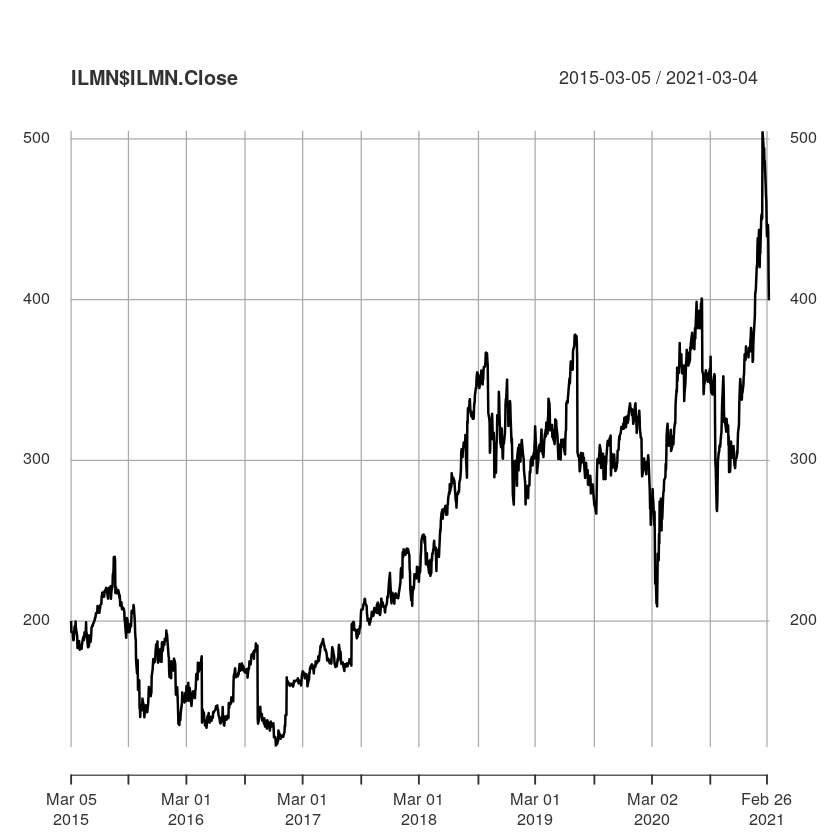

In [198]:
plot(ILMN$ILMN.Close)

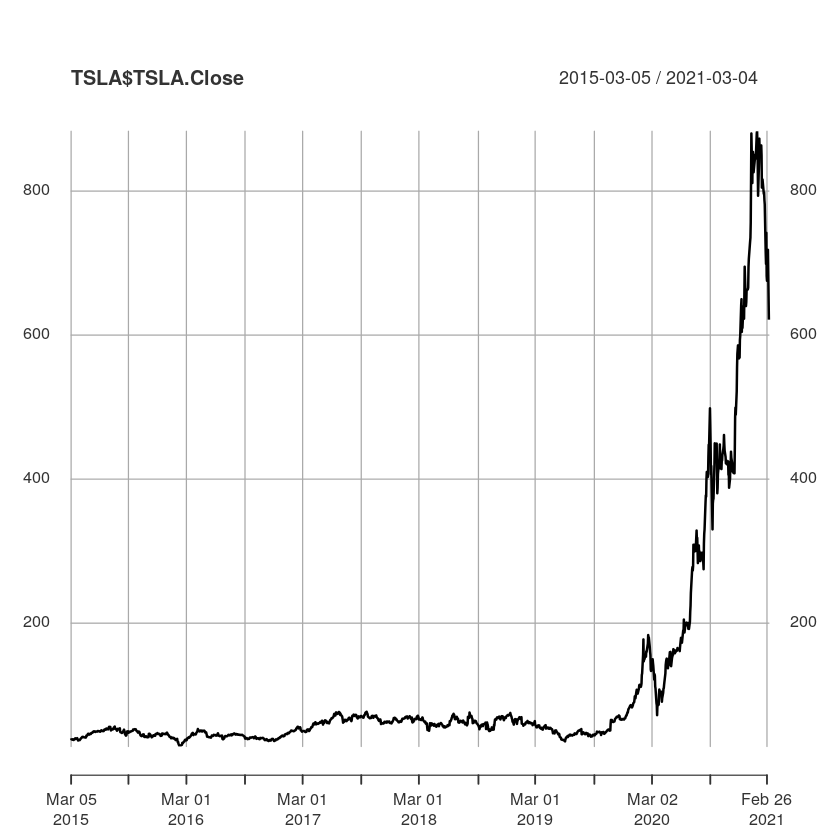

In [199]:
plot(TSLA$TSLA.Close)

<b>Plots of the closing price of TSLA stock show what looks to be somewhat of a stationary period with a small variance and somewhat constant mean, until 2019, when we started seeing what looks like expoentional growth. A plot of the ILMN stock price over the last five years shows high volatility, with the mean looking in an upward trend and the variance growing over time. 

c)(10 points) Fit the best arima model to each four months of data for each stock (a total of 36models) using the auto.arima() function from the forecast package. Which are the ARIMA models with the highest frequency?

In [66]:
library(forecast)

We have 6 years of data, looking at 3 models per year at 4 month window frames each. Thats 18 models for each stock and 36 total for the TSLA and ILMN stock. 

In [205]:
start_date = as.Date('03-05-2015', format = "%m-%d-%Y")
end_date =  as.Date('03-05-2021', format = "%m-%d-%Y")
window = "4 month"

symbols = c("TSLA", "ILMN")
# for (ticker in symbols) {# } 

current_date = ymd(start_date)
while (current_date < ymd(end_date)) {
    print(current_date)
    print(current_date %m+% period(window))
    # Get the data
    getSymbols(c(symbols[1]),
           from=current_date, 
           to=current_date %m+% period(window),
          warnings=FALSE, auto.assign=TRUE)
    # Fit the model
    model = auto.arima(TSLA$TSLA.Close)
    print(model)
    current_date = current_date %m+% period(window)
}

current_date = ymd(start_date)
while (current_date < ymd(end_date)) {
    print(current_date)
    print(current_date %m+% period(window))
    # Get the data
    getSymbols(c(symbols[2]),
           from=current_date, 
           to=current_date %m+% period(window),
          warnings=FALSE, auto.assign=TRUE)
    # Fit the model
    model = auto.arima(ILMN$ILMN.Close)
    print(model)
    current_date = current_date %m+% period(window)
}



[1] "2015-03-05"
[1] "2015-07-05"
Series: TSLA$TSLA.Close 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.1913
s.e.  0.0903

sigma^2 estimated as 0.6848:  log likelihood=-101.56
AIC=207.11   AICc=207.26   BIC=211.95
[1] "2015-07-05"
[1] "2015-11-05"
Series: TSLA$TSLA.Close 
ARIMA(0,1,0) 

sigma^2 estimated as 2.15:  log likelihood=-154.94
AIC=311.87   AICc=311.92   BIC=314.33
[1] "2015-11-05"
[1] "2016-03-05"
Series: TSLA$TSLA.Close 
ARIMA(0,1,0) 

sigma^2 estimated as 1.405:  log likelihood=-128.7
AIC=259.39   AICc=259.45   BIC=261.79
[1] "2016-03-05"
[1] "2016-07-05"
Series: TSLA$TSLA.Close 
ARIMA(0,1,0) 

sigma^2 estimated as 1.286:  log likelihood=-126.67
AIC=255.34   AICc=255.39   BIC=257.74
[1] "2016-07-05"
[1] "2016-11-05"
Series: TSLA$TSLA.Close 
ARIMA(0,1,0) 

sigma^2 estimated as 0.5164:  log likelihood=-94.7
AIC=191.39   AICc=191.44   BIC=193.86
[1] "2016-11-05"
[1] "2017-03-05"
Series: TSLA$TSLA.Close 
ARIMA(0,1,0) 

sigma^2 estimated as 0.8809:  log likelihoo

<b>
For TSLA, we see mostly ARIMA(0,1,0) as the most frequent model, followed by ARIMA(0,2,1). 
    
For ILMN, we see ARIMA(0,1,0) as the most frequent model.

<b>

d)(5 points) Forecast stock prices 12 days ahead using these models and data windows and plot the forecasts using the command plot(best.model, n.ahead=12)

List of 18
 $ coef     : Named num -0.933
  ..- attr(*, "names")= chr "ma1"
 $ sigma2   : num 778
 $ var.coef : num [1, 1] 0.0017
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr "ma1"
  .. ..$ : chr "ma1"
 $ mask     : logi TRUE
 $ loglik   : num -376
 $ aic      : num 755
 $ arma     : int [1:7] 0 1 0 0 1 2 0
 $ residuals: Time-Series [1:81] from 1 to 81: 0.196 -0.606 -0.403 -2.097 14.325 ...
 $ call     : language auto.arima(y = TSLA$TSLA.Close, ic = "aicc", x = list(x = c(438.089996,  429.950012, 421.26001, 410.359985, 417.1| __truncated__ ...
 $ series   : chr "TSLA$TSLA.Close"
 $ code     : int 0
 $ n.cond   : int 0
 $ nobs     : int 79
 $ model    :List of 10
  ..$ phi  : num(0) 
  ..$ theta: num -0.933
  ..$ Delta: num [1:2] 2 -1
  ..$ Z    : num [1:4] 1 0 2 -1
  ..$ a    : num [1:4] 1.48 22.67 653.2 686.44
  ..$ P    : num [1:4, 1:4] -6.66e-16 1.11e-16 2.50e-16 -1.74e-16 1.11e-16 ...
  ..$ T    : num [1:4, 1:4] 0 0 1 0 1 0 0 0 0 0 ...
  ..$ V    : num [1:4, 1:4] 1 -0.933 0 0

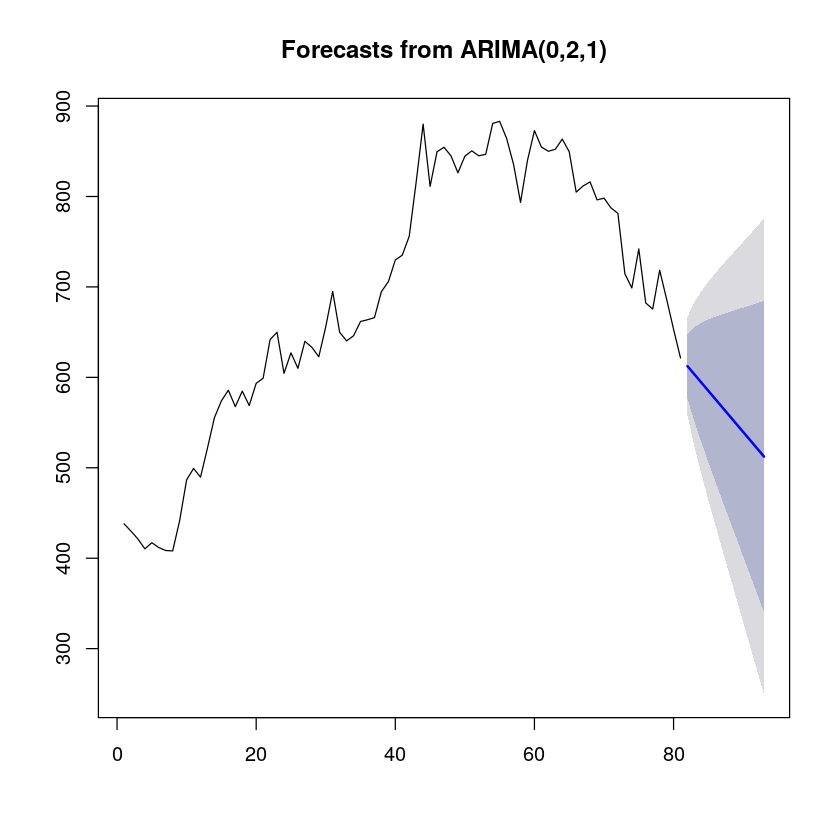

In [217]:
fit <- auto.arima(TSLA$TSLA.Close,ic = 'aicc')
plot(forecast(fit,h=12))
str(fit)

List of 18
 $ coef     : num(0) 
 $ sigma2   : num 104
 $ var.coef : num(0) 
 $ mask     : logi(0) 
 $ loglik   : num -299
 $ aic      : num 600
 $ arma     : int [1:7] 0 0 0 0 1 1 0
 $ residuals: Time-Series [1:81] from 1 to 81: 0.312 -3.56 -2.47 -4.13 0.79 ...
 $ call     : language auto.arima(y = ILMN$ILMN.Close, ic = "aicc", x = list(x = c(311.720001,  308.160004, 305.690002, 301.559998, 302.| __truncated__ ...
 $ series   : chr "ILMN$ILMN.Close"
 $ code     : num 0
 $ n.cond   : int 0
 $ nobs     : int 80
 $ model    :List of 10
  ..$ phi  : num(0) 
  ..$ theta: num(0) 
  ..$ Delta: num 1
  ..$ Z    : num [1:2] 1 1
  ..$ a    : num [1:2] -16.8 416.4
  ..$ P    : num [1:2, 1:2] 0.00 -7.42e-23 -7.42e-23 7.42e-23
  ..$ T    : num [1:2, 1:2] 0 1 0 1
  ..$ V    : num [1:2, 1:2] 1 0 0 0
  ..$ h    : num 0
  ..$ Pn   : num [1:2, 1:2] 1.00 0.00 0.00 7.42e-23
 $ bic      : num 603
 $ aicc     : num 600
 $ x        : Time-Series [1:81] from 1 to 81: 312 308 306 302 302 ...
 $ fitted   : Tim

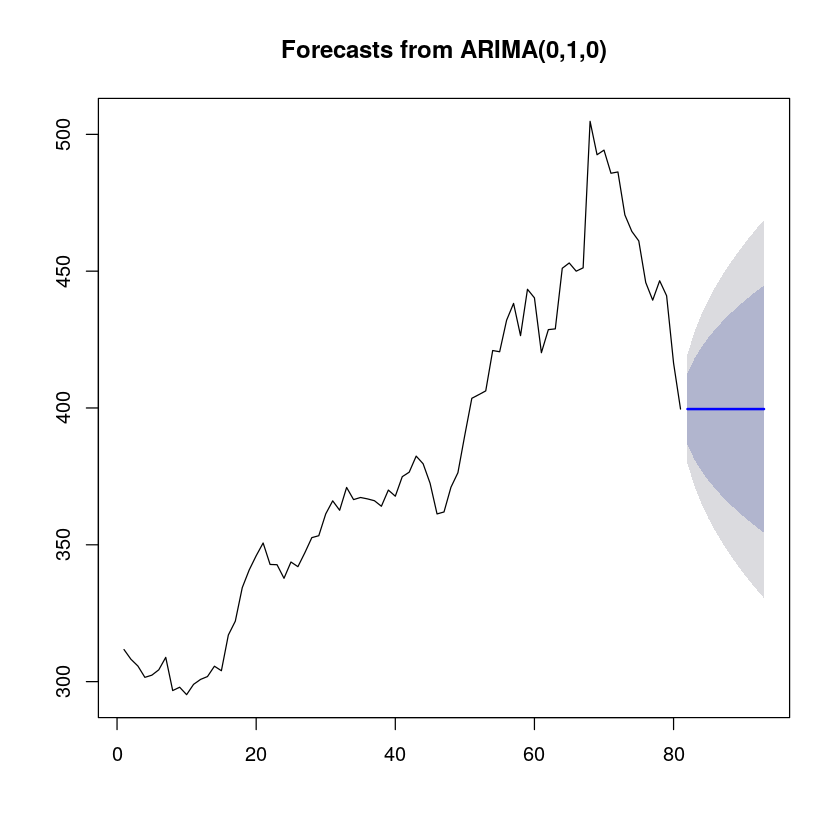

In [218]:
fit <- auto.arima(ILMN$ILMN.Close,ic = 'aicc')
plot(forecast(fit,h=12))
str(fit)

References

https://otexts.com/fpp2/arima-r.html

http://statmath.wu.ac.at/~hornik/QFS1/quantmod-vignette.pdf

https://www.rdocumentation.org/packages/forecast/versions/8.13/topics/auto.arima